<a href="https://colab.research.google.com/github/Abhishek2104200/TechnoHacks/blob/main/wine_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv('/winequality-red.csv')

# Check data samples
Let's look at a few data samples with head() method.

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.shape

(1599, 12)

# Features

| Feature           | Significance  |
| ----------------- | ------------- |
| Fixed acidity     | Most acids involved with wine or fixed or nonvolatile (do not evaporate readily)  |
| Volitile acidity  | The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste  |
| Citric acid       |  Found in small quantities, citric acid can add 'freshness' and flavor to wines     |
| Residual sugar    |  it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet. |
| Chlorides         |  The amount of salt in the wine. |
| Free sulphur dioxide | The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine. |
| Total sulphur dioxide | Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine. |
| Density           |  The density of water is close to that of water depending on the percent alcohol and sugar content. |
| pH                |  Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.              |
| Sulphates         | Wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant. |
| Alcohol           | The percentage of alcohol contents in the wine.              |

In [6]:
feature_list = data.columns[:-1].values
label = [data.columns[-1]]

print ("Feature list:", feature_list)
print ("Label:", label)

Feature list: ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Label: ['quality']


# Data statistics
Let's use info() method to get quick description of data.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [10]:
sns.set()

Text(0, 0.5, 'Count')

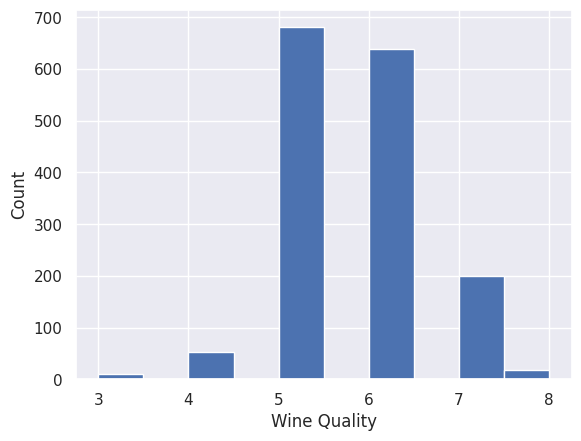

In [11]:
data.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

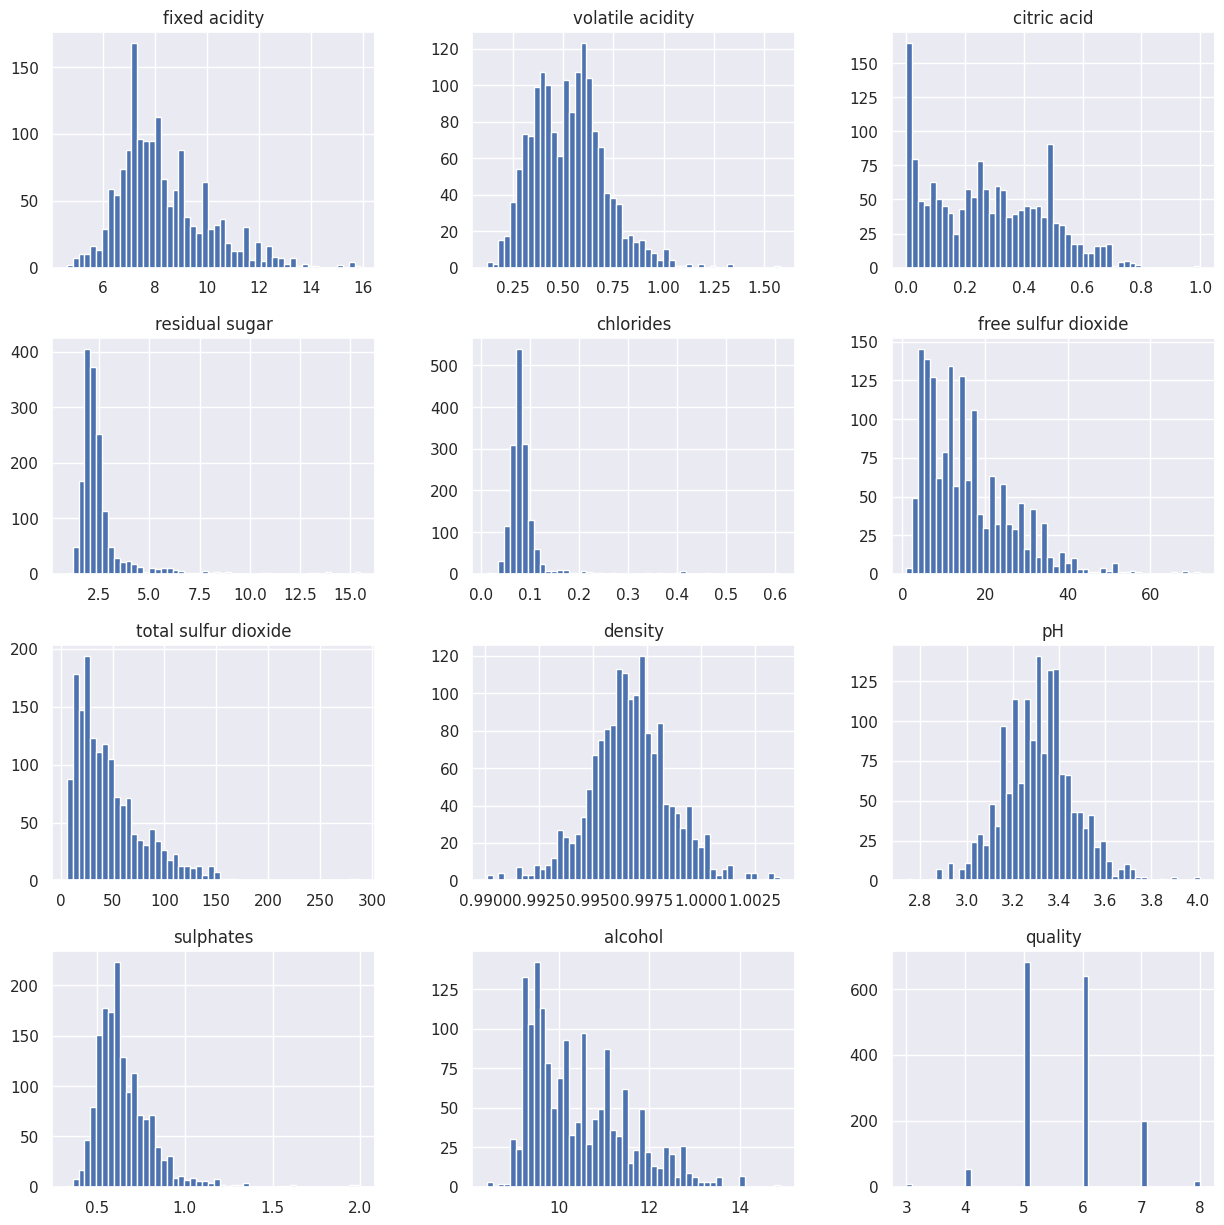

In [13]:
data.hist(bins=50,figsize=(15,15))

plt.show()

# Create test set

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

# Stratified sampling



Text(0, 0.5, 'Count')

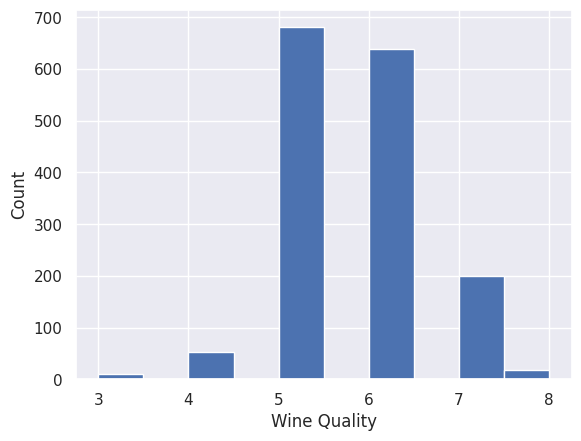

In [16]:
data.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

* Many examples of class 5 and 6 compared to the other classes.
* This causes a problem while random sampling. The test distribution may not match with the overall distribution.

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(data, data["quality"]):
  strat_train_set = data.loc[train_index]
  strat_test_set = data.loc[test_index]

In [18]:
train_index, test_index= next(sss.split(data, data["quality"]))
strat_train_set = data.loc[train_index]
strat_test_set = data.loc[test_index]

In [19]:
strat_train_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1542,6.7,0.855,0.02,1.90,0.064,29.0,38.0,0.99472,3.30,0.56,10.75,6
1558,6.9,0.630,0.33,6.70,0.235,66.0,115.0,0.99787,3.22,0.56,9.50,5
344,11.9,0.570,0.50,2.60,0.082,6.0,32.0,1.00060,3.12,0.78,10.70,6
924,8.6,0.470,0.27,2.30,0.055,14.0,28.0,0.99516,3.18,0.80,11.20,5
971,10.4,0.260,0.48,1.90,0.066,6.0,10.0,0.99724,3.33,0.87,10.90,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1056,8.9,0.480,0.53,4.00,0.101,3.0,10.0,0.99586,3.21,0.59,12.10,7
1394,6.4,0.570,0.14,3.90,0.070,27.0,73.0,0.99669,3.32,0.48,9.20,5
337,7.8,0.430,0.32,2.80,0.080,29.0,58.0,0.99740,3.31,0.64,10.30,5
539,11.2,0.500,0.74,5.15,0.100,5.0,17.0,0.99960,3.22,0.62,11.20,5


In [20]:
strat_dist = strat_test_set["quality"].value_counts() / len(strat_test_set)

In [21]:
overall_dist = data["quality"].value_counts() / len(data)

In [22]:
dist_comparison = pd.DataFrame({'overall': overall_dist, 'stratified': strat_dist})
dist_comparison['diff(s-o)'] = dist_comparison['stratified'] - dist_comparison['overall']
dist_comparison['diff(s-o)_pct'] = 100*(dist_comparison['diff(s-o)']/dist_comparison['overall'])

In [23]:
dist_comparison

,overall,stratified,diff(s-o),diff(s-o)_pct
quality,,,,
5,0.425891,0.425000,-0.000891,-0.209251
6,0.398999,0.400000,0.001001,0.250784
7,0.124453,0.125000,0.000547,0.439698
4,0.033146,0.034375,0.001229,3.708726
8,0.011257,0.009375,-0.001882,-16.718750
3,0.006254,0.006250,-0.000004,-0.062500


from matplotlib import pyplot as plt
_df_0['quality'].plot(kind='hist', bins=20, title='quality')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['overall'].plot(kind='hist', bins=20, title='overall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['stratified'].plot(kind='hist', bins=20, title='stratified')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['diff(s-o)'].plot(kind='hist', bins=20, title='diff(s-o)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='quality', y='overall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='overall', y='stratified', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='stratified', y='diff(s-o)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='diff(s-o)', y='diff(s-o)_pct', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['quality'].plot(kind='line', figsize=(8, 4), title='quality')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['overall'].plot(kind='line', figsize=(8, 4), title='overall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['stratified'].plot(kind='line', figsize=(8, 4), title='stratified')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['diff(s-o)'].plot(kind='line', figsize=(8, 4), title='diff(s-o)')
plt.gca().spines[['top', 'right']].set_visible(False)

Let's contrast this with random sampling:

In [24]:
random_dist = test_set["quality"].value_counts() / len(test_set)
random_dist

quality
6    0.412500
5    0.406250
7    0.131250
4    0.031250
8    0.015625
3    0.003125
Name: count, dtype: float64

In [25]:
dist_comparison['random'] = random_dist
dist_comparison['diff(r-o)'] = dist_comparison['random'] - dist_comparison['overall']
dist_comparison['diff(r-o)_pct'] = 100*(dist_comparison['diff(r-o)']/dist_comparison['overall'])

In [26]:
dist_comparison.loc[:, ['diff(s-o)_pct', 'diff(r-o)_pct']]

,diff(s-o)_pct,diff(r-o)_pct
quality,,
5,-0.209251,-4.611784
6,0.250784,3.383621
7,0.439698,5.461683
4,3.708726,-5.719340
8,-16.718750,38.802083
3,-0.062500,-50.031250


# Step 3: Data visualization



In [27]:
exploration_set = strat_train_set.copy()

<Axes: xlabel='fixed acidity', ylabel='density'>

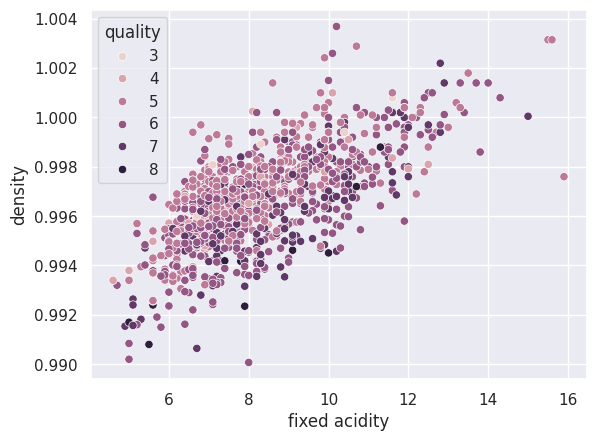

In [28]:
sns.scatterplot(x='fixed acidity', y='density', hue='quality',
                data=exploration_set)

<Axes: xlabel='fixed acidity', ylabel='density'>

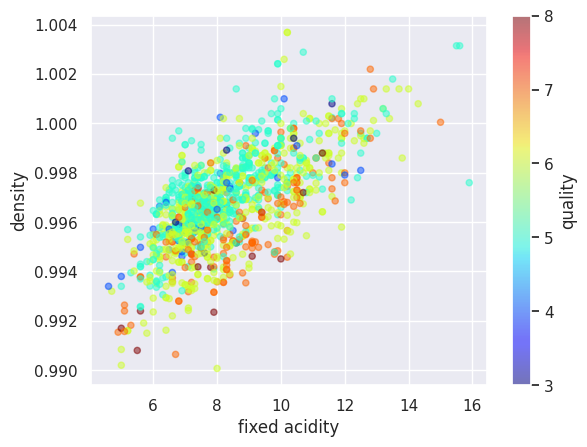

In [29]:
exploration_set.plot(kind='scatter', x='fixed acidity', y='density', alpha=0.5,
                     c="quality", cmap=plt.get_cmap("jet"))

In [30]:
corr_matrix = exploration_set.corr()

In [31]:
corr_matrix['quality']

fixed acidity           0.107940
volatile acidity       -0.383249
citric acid             0.210802
residual sugar          0.003710
chlorides              -0.120231
free sulfur dioxide    -0.048291
total sulfur dioxide   -0.194511
density                -0.193009
pH                     -0.052063
sulphates               0.228050
alcohol                 0.481197
quality                 1.000000
Name: quality, dtype: float64

<Axes: >

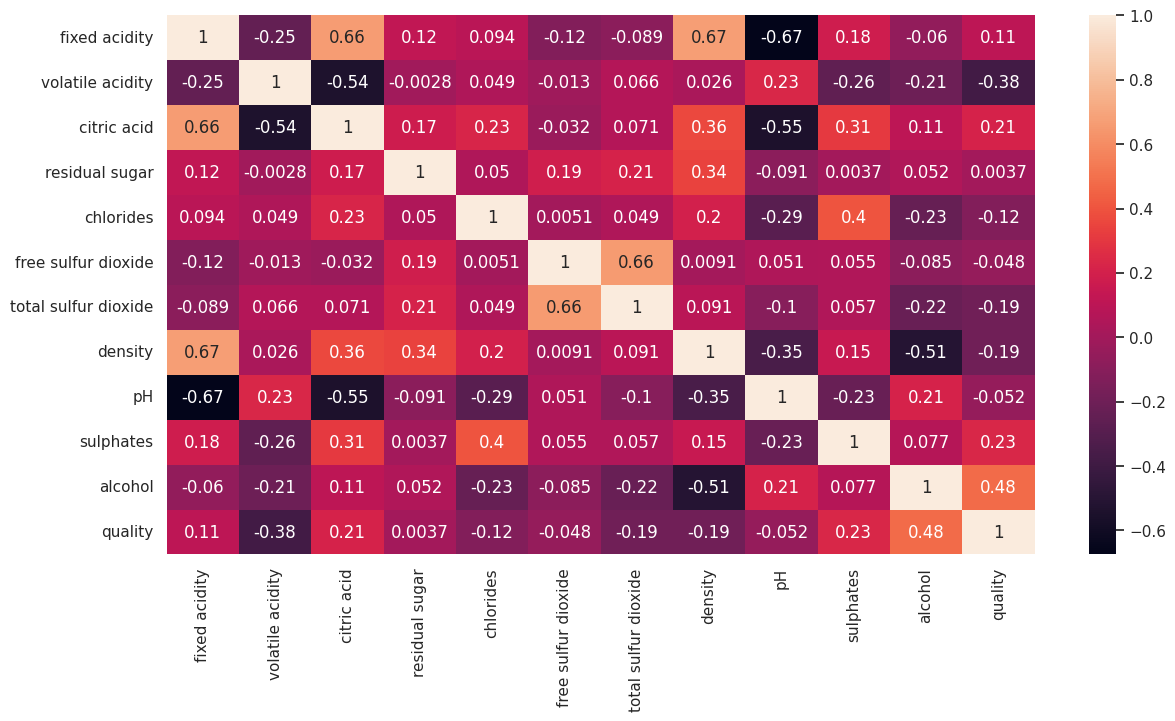

In [32]:
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix, annot=True)

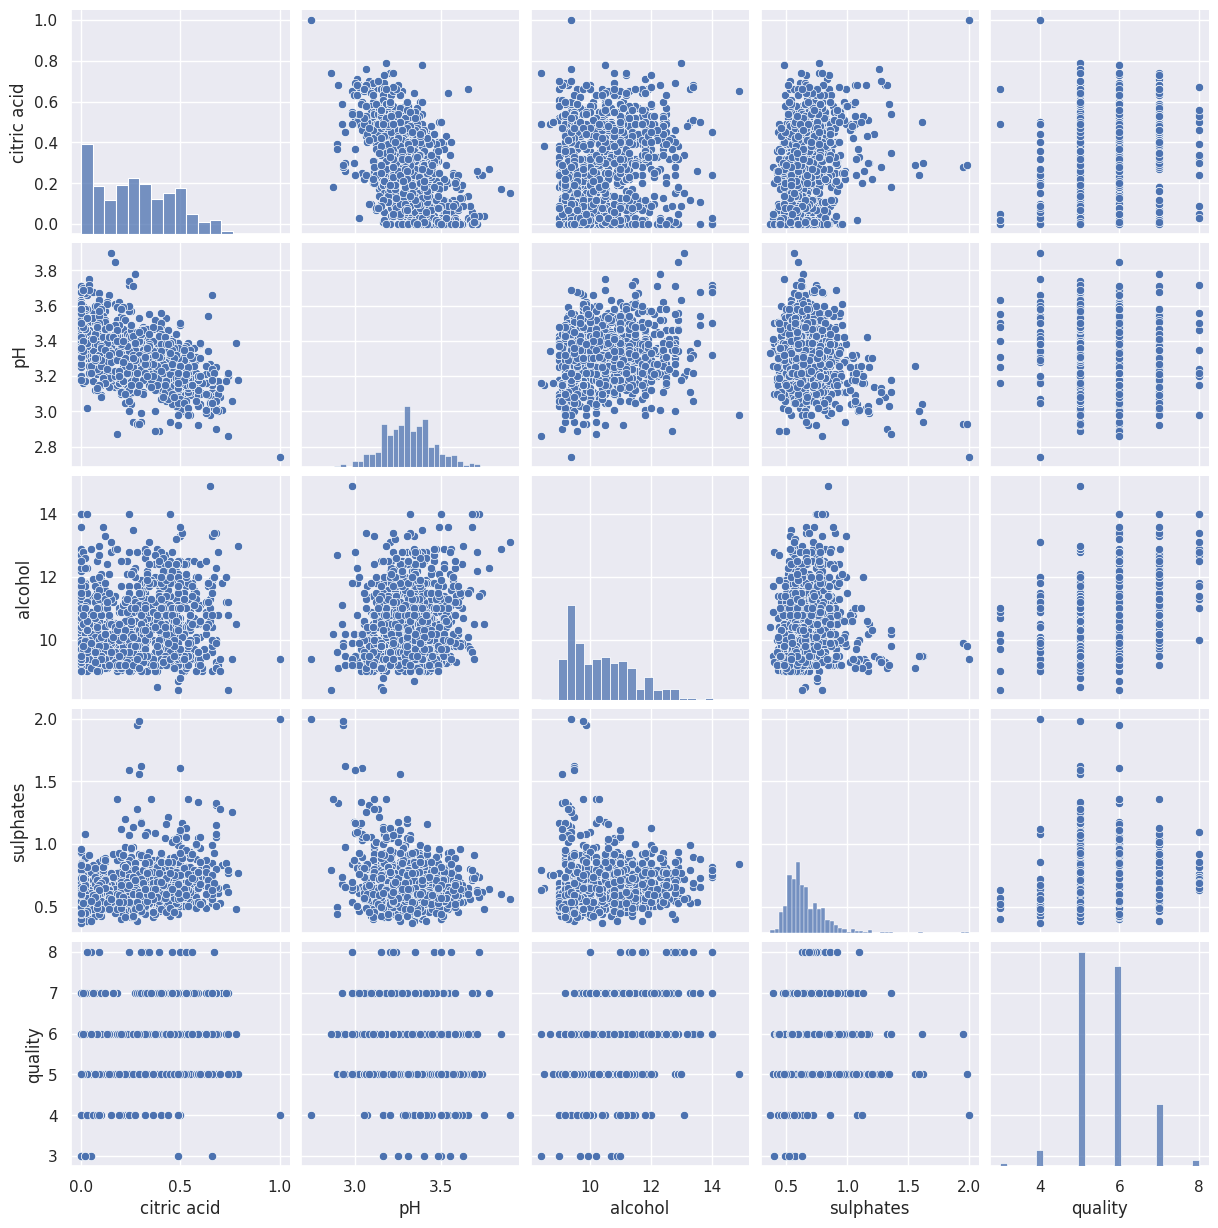

In [33]:
import warnings


warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

attribute_list = ['citric acid', 'pH', 'alcohol', 'sulphates', 'quality']
sns.pairplot(exploration_set[attribute_list])
plt.show()

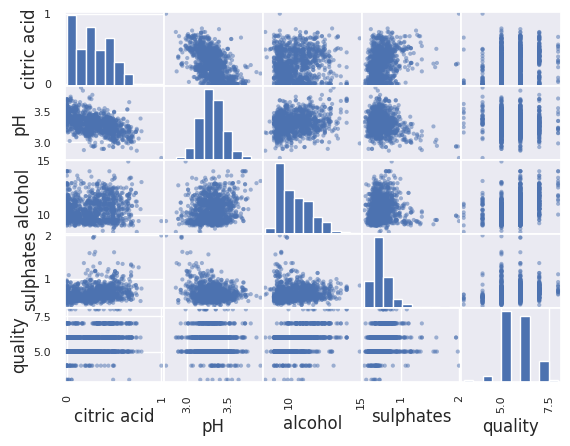

In [34]:
from pandas.plotting import scatter_matrix
scatter_matrix(exploration_set[attribute_list])
plt.show()

# Separate features and labels from the training set.

In [35]:
wine_features = strat_train_set.drop("quality", axis=1)

wine_labels = strat_train_set['quality'].copy()

In [36]:
wine_features.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

* `SimpleImputer` class for filling up missing values with. say, `median` value.
* The `strategy` contains instructions as how to replace the missing values.  In this case, we specify that the missing value should be replaced by the median value.  


In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [38]:
imputer.fit(wine_features)

SimpleImputer(strategy='median')

In [39]:
imputer.statistics_

array([ 7.9    ,  0.52   ,  0.26   ,  2.2    ,  0.08   , 14.     ,
       39.     ,  0.99675,  3.31   ,  0.62   , 10.2    ])

Note that these are median values for each feature.  We can cross-check it by calculating median on the feature set:

In [40]:
wine_features.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.08000
free sulfur dioxide     14.00000
total sulfur dioxide    39.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
dtype: float64

In [41]:
tr_features = imputer.transform(wine_features)

In [42]:
tr_features.shape

(1279, 11)

# Converting categories to numbers

In [43]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [44]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

# Transformation Pipeline

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

transform_pipeline = Pipeline([
                               ('imputer', SimpleImputer(strategy="median")),
                               ('std_scaler', StandardScaler()),])
transform_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler())])

In [46]:
wine_features_tr = transform_pipeline.fit_transform(wine_features)

# Select and train ML model

* It's a good practice to build a quick baseline model on the preprocessed data and get an idea about model performance.

In [47]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(wine_features_tr, wine_labels)

LinearRegression()

In [48]:
from sklearn.metrics import mean_squared_error

quality_predictions =  lin_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_predictions)

0.4206571060060277

Let's evaluate performance on the test set.

* We need to first apply transformation on the test set and then apply the model prediction function.

In [49]:
wine_features_test = strat_test_set.drop("quality", axis=1)

wine_labels_test = strat_test_set['quality'].copy()

wine_features_test_tr = transform_pipeline.transform(wine_features_test)

quality_test_predictions = lin_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.40636065372564323

Text(0, 0.5, 'Predicted quality')

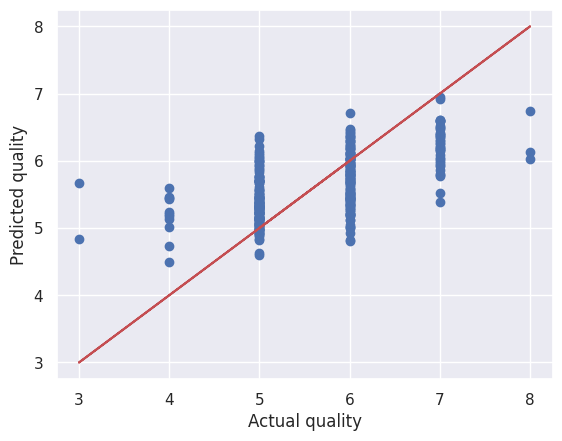

In [50]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

The model seem to be making errors on the best and poor quality wines.

In [51]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(wine_features_tr, wine_labels)

DecisionTreeRegressor()

In [52]:
quality_predictions =  tree_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_predictions)

0.0

In [53]:
quality_test_predictions = tree_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.54375

**Note that the training error is 0, while the test error is 0.58. This is an example of an overfitted model.**

Text(0, 0.5, 'Predicted quality')

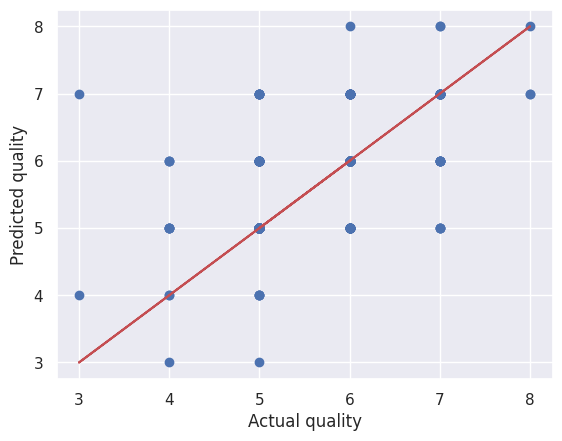

In [54]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

In [57]:
scores = cross_val_score(lin_reg, wine_features_tr, wine_labels,
                         scoring="neg_mean_squared_error", cv=10)
lin_reg_mse_scores = -scores
display_scores(lin_reg_mse_scores)

Scores: [0.56364537 0.4429824  0.38302744 0.40166681 0.29687635 0.37322622
 0.33184855 0.50182048 0.51661311 0.50468542]
Mean: 0.431639217212196
Standard deviation: 0.08356359730413963


In [58]:
scores = cross_val_score(tree_reg, wine_features_tr, wine_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_mse_scores = -scores
display_scores(tree_mse_scores)

Scores: [0.5546875  0.71875    0.6171875  0.578125   0.421875   0.578125
 0.609375   0.734375   0.796875   1.02362205]
Mean: 0.6632997047244095
Standard deviation: 0.156661147637761


In [59]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(wine_features_tr, wine_labels)

scores = cross_val_score(forest_reg, wine_features_tr, wine_labels,
                         scoring="neg_mean_squared_error", cv=10)
forest_mse_scores = -scores
display_scores(forest_mse_scores)

Scores: [0.38894453 0.41705    0.28006328 0.31772109 0.22135    0.29627578
 0.28080469 0.37293125 0.42271875 0.47617087]
Mean: 0.34740302411417323
Standard deviation: 0.07605002323361243


In [60]:
quality_test_predictions = forest_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.32136312499999997

Text(0, 0.5, 'Predicted quality')

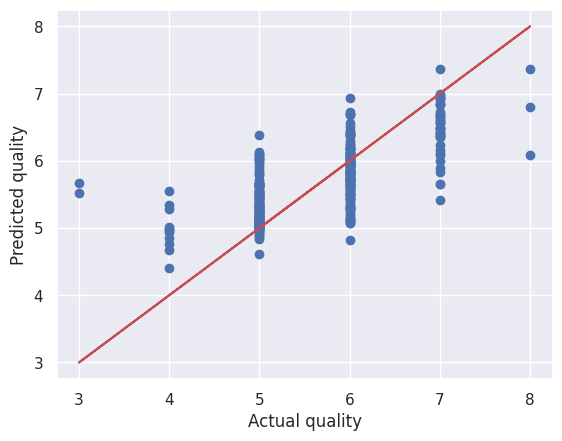

In [61]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

* Random forest looks more promising than the other two

# Finetuning the  models

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [64]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

In [65]:
grid_search.fit(wine_features_tr, wine_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [66]:
 grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [67]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(-mean_score, params)

0.5247926879084968 {'max_features': 2, 'n_estimators': 3}
0.38595713848039215 {'max_features': 2, 'n_estimators': 10}
0.36334862472766877 {'max_features': 2, 'n_estimators': 30}
0.508797998366013 {'max_features': 4, 'n_estimators': 3}
0.3836654105392157 {'max_features': 4, 'n_estimators': 10}
0.3593800483387799 {'max_features': 4, 'n_estimators': 30}
0.47485226034858374 {'max_features': 6, 'n_estimators': 3}
0.3760258884803921 {'max_features': 6, 'n_estimators': 10}
0.3673657747821351 {'max_features': 6, 'n_estimators': 30}
0.4760505174291939 {'max_features': 8, 'n_estimators': 3}
0.39957643995098036 {'max_features': 8, 'n_estimators': 10}
0.3747968647875817 {'max_features': 8, 'n_estimators': 30}
0.44878880718954245 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.37013716299019606 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.44779207516339864 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.38171176470588236 {'bootstrap': False, 'max_features'

In [68]:
 grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30)

# Randomized Search

In [69]:
from sklearn.model_selection import RandomizedSearchCV

In [70]:
 feature_importances = grid_search.best_estimator_.feature_importances_

In [71]:
sorted(zip(feature_importances, feature_list), reverse=True)

[(0.22687151267483135, 'alcohol'),
 (0.1402954536612259, 'sulphates'),
 (0.1204718133479734, 'volatile acidity'),
 (0.07848309339198646, 'total sulfur dioxide'),
 (0.07538682424328162, 'density'),
 (0.06821334711682812, 'chlorides'),
 (0.06505542205697604, 'citric acid'),
 (0.06254761829935504, 'fixed acidity'),
 (0.05810836048940919, 'residual sugar'),
 (0.057680112774124784, 'pH'),
 (0.04688644194400813, 'free sulfur dioxide')]


#### Evaluation on test set

Now that we have a reasonable model, we evaluate its performance on the test set.

In [74]:
wine_features_test = strat_test_set.drop("quality", axis=1)

wine_labels_test = strat_test_set['quality'].copy()

wine_features_test_tr = transform_pipeline.transform(wine_features_test)

In [75]:
quality_test_predictions = grid_search.best_estimator_.predict(
    wine_features_test_tr)

In [73]:
mean_squared_error(wine_labels_test, quality_test_predictions)

0.32136312499999997

**It's a good idea to get  95%  confidence interval of the evaluation metric. It can be obtained by the following code**

In [72]:
from scipy import stats
confidence = 0.95
squared_errors = (quality_test_predictions - wine_labels_test) ** 2
stats.t.interval(confidence, len(squared_errors) - 1,
                 loc=squared_errors.mean(),
                 scale=stats.sem(squared_errors))

(0.24693940820016558, 0.39578684179983437)